In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from statsmodels.tsa.arima_model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('../../../data/pred/df_to_pred.csv')
df.tail()

,data,valorReal,mes
33,2019-10,3231313.84,10
34,2019-11,2533667.48,11
35,2019-12,3546494.10,12
36,2020-01,2928523.90,1
37,2020-02,1858077.75,2


In [3]:
df.index = df.data
df = df.dropna()

In [4]:
df_with_features = df.drop(['data'], axis=1)
df_with_features.head()

,valorReal,mes
data,,
2017-01,1904785.30,1
2017-02,1878276.29,2
2017-03,1895962.97,3
2017-04,2103872.48,4
2017-05,1941807.41,5


In [5]:
df_without_features = df[['valorReal', 'mes']]
df_without_features.head()

,valorReal,mes
data,,
2017-01,1904785.30,1
2017-02,1878276.29,2
2017-03,1895962.97,3
2017-04,2103872.48,4
2017-05,1941807.41,5


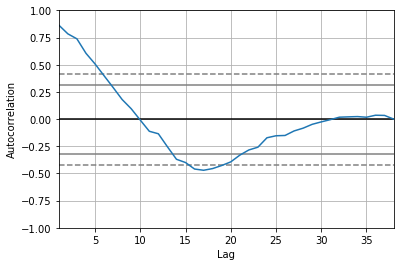

In [6]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
series = df_without_features['valorReal']

autocorrelation_plot(series)
pyplot.show()

### MAPE

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Models 

In [8]:
dataframes = {}
dataframes['df_with_features']       = df_with_features
dataframes['df_without_features']    = df_without_features

In [9]:
models = {}
models['Linear Regression']     = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True, normalize=True))])
models['GradientBoosting']      = GradientBoostingRegressor(random_state=0)
models['RandomForestRegressor'] = RandomForestRegressor(random_state=0, n_estimators=100)

In [10]:
rmse_result = []

for df_name, df in dataframes.items():
     
    X = df.drop('valorReal', axis = 1)
    y = df['valorReal'] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.05,
                                                        random_state=42, 
                                                        shuffle=False)
    print("\nDataframe de treino: \n", X_train)
    print("Datafram ede teste: \n", X_test,'\n')
    print('Valores reais: ',y_test.values)
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('Valor Predito do modelo ', model_name,':', y_pred)
        rmse = np.sqrt(mse(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        rmse_result.append((df_name, model_name, rmse, mape))


Dataframe de treino: 
          mes
data        
2017-01    1
2017-02    2
2017-03    3
2017-04    4
2017-05    5
2017-06    6
2017-07    7
2017-08    8
2017-09    9
2017-10   10
2017-11   11
2017-12   12
2018-01    1
2018-02    2
2018-03    3
2018-04    4
2018-05    5
2018-06    6
2018-07    7
2018-08    8
2018-09    9
2018-10   10
2018-11   11
2018-12   12
2019-01    1
2019-02    2
2019-03    3
2019-04    4
2019-05    5
2019-06    6
2019-07    7
2019-08    8
2019-09    9
2019-10   10
2019-11   11
2019-12   12
Datafram ede teste: 
          mes
data        
2020-01    1
2020-02    2 

Valores reais:  [2928523.9  1858077.75]
Valor Predito do modelo  Linear Regression : [2395786.92313797 2591573.37499278]
Valor Predito do modelo  GradientBoosting : [2503933.24677762 2460723.64892874]
Valor Predito do modelo  RandomForestRegressor : [2477301.04786691 2407283.936575  ]

Dataframe de treino: 
          mes
data        
2017-01    1
2017-02    2
2017-03    3
2017-04    4
2017-05    5
2017-

In [11]:
pd.DataFrame(rmse_result, 
             columns=['DataSet','Modelo','RMSE', 'MAPE']).sort_values(by=['DataSet', 'RMSE'], 
             ascending=[False, True])

,DataSet,Modelo,RMSE,MAPE
5,df_without_features,RandomForestRegressor,502607.947440,22.482810
4,df_without_features,GradientBoosting,521276.942853,23.466145
3,df_without_features,Linear Regression,641024.382687,28.833680
2,df_with_features,RandomForestRegressor,502607.947440,22.482810
1,df_with_features,GradientBoosting,521276.942853,23.466145
0,df_with_features,Linear Regression,641024.382687,28.833680


### Visualization

In [12]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [13]:
X = df.drop('valorReal', axis = 1)
y = df['valorReal'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

x = X_test.index

In [14]:
# Training classifiers
reg1 = GradientBoostingRegressor(random_state=0)
reg2 = RandomForestRegressor(random_state=0, n_estimators=100)
reg3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True, normalize=True))])

In [15]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [16]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'


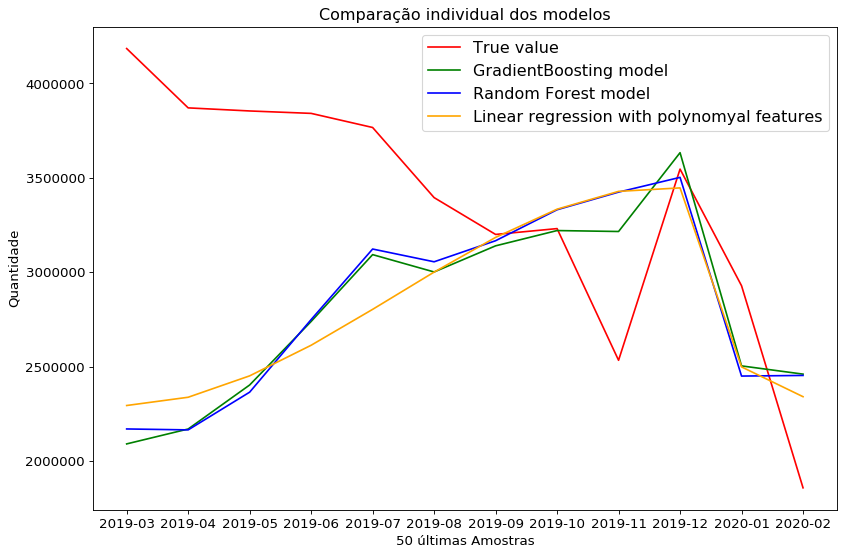

In [17]:
plt.plot(x,y_test, color='red', label='True value')
plt.plot(x,reg1.predict(X_test), color='green', label='GradientBoosting model')
plt.plot(x,reg2.predict(X_test), color='blue', label='Random Forest model')
plt.plot(x,reg3.predict(X_test), color='orange', label='Linear regression with polynomyal features')

plt.ylabel('Quantidade')
plt.xlabel('50 últimas Amostras')
plt.legend(loc="best")
plt.title('Comparação individual dos modelos')
plt.show()

### Model SARIMA and ARIMA 